# EDA
Se hará una comprobación y visualización rápida de los datos obtenidos en 'user_reviews_cleaned.csv' y 'steam_games_cleaned.csv'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#Biblioteca para crear nubes de palabras en Python
from wordcloud import WordCloud

In [2]:
# Cargar CSV creados anteriormente (limpiados)
df_UserReviews=pd.read_csv('user_reviews_cleaned.csv')
df_SteamGames=pd.read_csv('steam_games_cleaned.csv')

In [3]:
# Vemos las estadisticas descriptivas del dataframe
df_UserReviews.describe(include='all')

,user_id,item_id,recommend,review,year,sentiment_analysis
count,44428,44428.000000,44428,44428,44428.000000,44428.000000
unique,20193,NaN,2,43198,NaN,NaN
top,INFERNOpineapple,NaN,True,great game,NaN,NaN
freq,10,NaN,38912,212,NaN,NaN
mean,NaN,176585.757090,NaN,NaN,2014.250878,1.522126
std,NaN,131125.991208,NaN,NaN,0.827337,0.788950
min,NaN,10.000000,NaN,NaN,2010.000000,0.000000
25%,NaN,20920.000000,NaN,NaN,2014.000000,1.000000
50%,NaN,218620.000000,NaN,NaN,2014.000000,2.000000
75%,NaN,265630.000000,NaN,NaN,2015.000000,2.000000


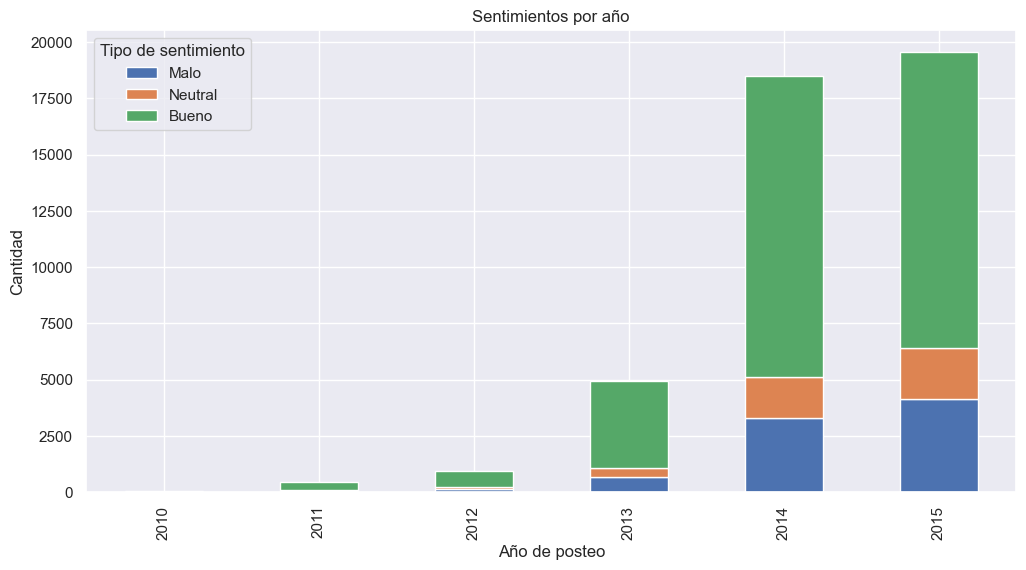

In [4]:
# Se crea un gráfico de barras de los sentimientos de los usuarios en cada año
sentimiento_colores = {
    0: ('Malo'),  
    1: ('Neutral'),
    2: ('Bueno') 
}

grouped_data = df_UserReviews.groupby(['year', 'sentiment_analysis']).size().reset_index(name='count')
pivot_data = grouped_data.pivot(index='year', columns='sentiment_analysis', values='count')
sns.set_theme(style='darkgrid')
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))

handles, labels = ax.get_legend_handles_labels()
custom_labels = [sentimiento_colores[int(label)] for label in labels]
ax.legend(handles, custom_labels, title='Tipo de sentimiento', loc='upper left')
plt.ylabel('Cantidad')
plt.xlabel('Año de posteo')
plt.title('Sentimientos por año')
plt.show()

Notas:
- Gran crecimientos de reseñas entre el año 2013 y 2014
- La mayoría de reseñas son positivas

In [5]:
# Se calcula la frecuencia de cada género sumando las columnas
frecuencia_generos = df_SteamGames[['Indie','Action','Casual','Adventure','Strategy','Simulation','RPG','Free to Play','Early Access' ,'Sports']].sum()
df_frecuencia_generos = pd.DataFrame({'Genero': frecuencia_generos.index, 'Frecuencia': frecuencia_generos.values})
df_frecuencia_generos = df_frecuencia_generos.sort_values(by='Frecuencia', ascending=False)

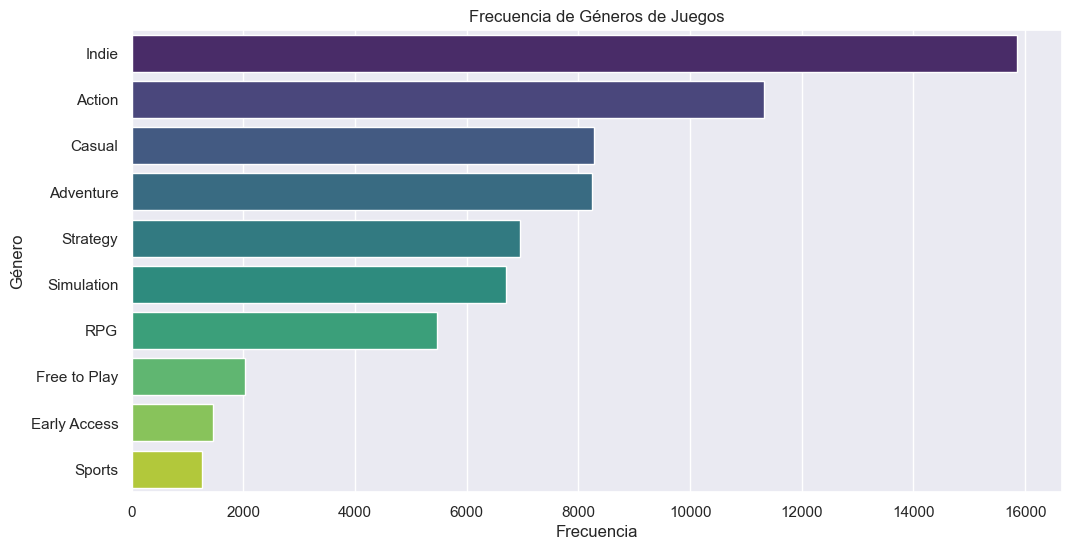

In [6]:
plt.figure(figsize=(12, 6))

# Se crea el gráfico de barras utilizando Seaborn
sns.barplot(x='Frecuencia', y='Genero', data=df_frecuencia_generos, palette='viridis')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.title('Frecuencia de Géneros de Juegos')
plt.show()

Text(0, 0.5, 'Año')

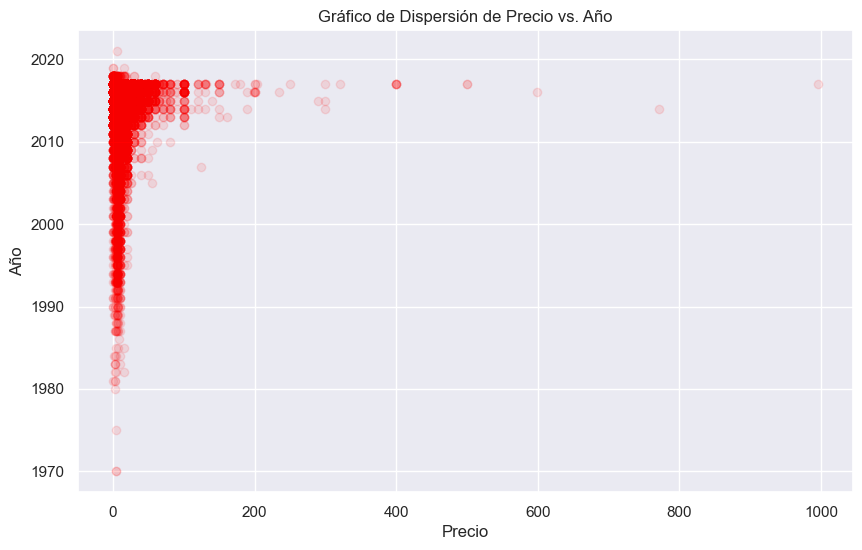

In [7]:
plt.figure(figsize=(10, 6))

# Se crea un scatter plot de year vs. price
plt.scatter(df_SteamGames['price'], df_SteamGames['year'], color='red', alpha=0.1)

# Se personaliza el gráfico con etiquetas y título
plt.title('Gráfico de Dispersión de Precio vs. Año')
plt.xlabel('Precio')
plt.ylabel('Año')

Notas:
- La gran mayoría de lanzamientos fueron entre los años 2010 y 2020
- También se nota la gran variedad de precios recién desde esos años

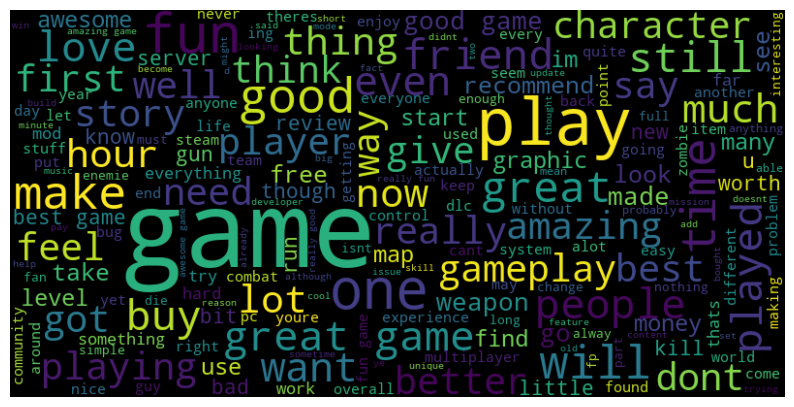

In [8]:
# Concatena todas las reviews en una sola cadena de texto
all_reviews = ' '.join(df_UserReviews['review'].dropna())

# Crea un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_reviews)

# Visualiza la nube de palabras
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()